In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
train=pd.read_csv('/content/drive/MyDrive/Data Science/train.csv')

In [101]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.shape

(159571, 8)

In [7]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [5]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
# Now, lets construct some new features

In [7]:
import nltk

In [8]:
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
train['length'] = train['comment_text'].apply(len)
train['uppercase'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['symbols'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c in ['!', '.', ',', ';', ':', '?', '*', '&', '$', '%', '#', '@',1,2,3,4,5,6,7,8,9,0]))
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['stop_words'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment.split() if c.lower() in stop))

In [8]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,uppercase,symbols,num_words,stop_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,7,43,18
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,6,17,2
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,4,42,20
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,7,113,56
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,4,13,5
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,1,2,13,4
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,37,0,8,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,4,3,20,12
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,7,10,83,42
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,2,0,12,8


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

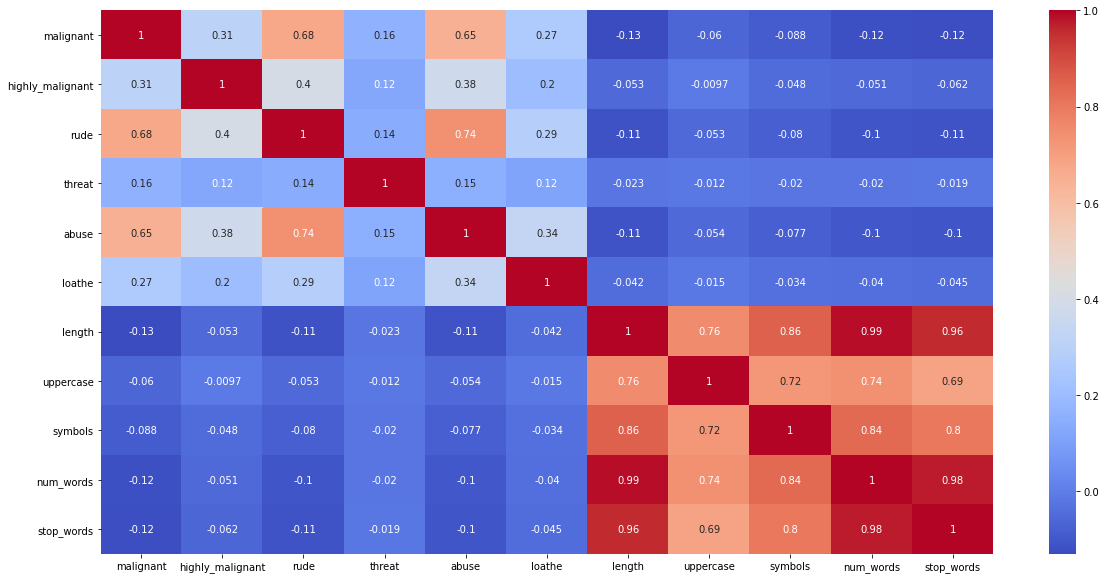

In [10]:
# Spearman correlation of features 

corr = train.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot = True)

In [54]:
# The features num_words and stop_words are highly correlated
# similarly, num_words and symbols are highly correlated
# num_words and stop_words are also highly correlated with feature length

In [30]:
# Now, lets check the distribution of the labels

In [10]:
unlabelled = train[(train['malignant']!=1) & (train['highly_malignant']!=1) &
                             (train['rude']!=1) & (train['threat']!=1) &
                             (train['abuse']!=1) & (train['loathe']!=1)]
print('Percentage of unlabelled comments or good comments is ', len(unlabelled)/len(train)*100)

Percentage of unlabelled comments or good comments is  89.83211235124176


In [11]:
# which are labelled in all columns
labelled = train[(train['malignant']==1) & (train['highly_malignant']==1) &
                             (train['rude']==1) & (train['threat']==1) &
                             (train['abuse']==1) & (train['loathe']==1)]
print('Percentage of labelled comments is ', len(labelled)/len(train)*100)

Percentage of labelled comments is  0.019427088882065038


In [12]:
# comments which belong to 2 or more categories
# apply row wise sum
labels=['malignant','highly_malignant','rude','threat','abuse','loathe']
label_df=train.loc[:, labels]
label_df['sum']=label_df.sum(axis=1)

In [13]:
two=0
for i in label_df['sum']:
  if i >=2:
    two+=1
print('The % of comments belonging to two or more classes at the same time ', two/len(train)*100)

The % of comments belonging to two or more classes at the same time  6.182201026502309


In [14]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in train is {}'.format(len(train)))
print(train[labels].sum())

Total rows in train is 159571
malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


In [13]:
label = train[['malignant','highly_malignant','rude','threat','abuse','loathe']]
label = label.to_numpy()

In [14]:
# ct1 counts samples having atleast one label
# ct2 counts samples having 2 or more than 2 labels
import numpy as np
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print('counts samples having atleast one label ', ct1)
print('counts samples having 2 or more than 2 label ', ct2)

counts samples having atleast one label  16225
counts samples having 2 or more than 2 label  9865


In [64]:
# Now, Lets perform some EDA

In [105]:
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,uppercase,symbols,num_words,stop_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,7,43,18
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,6,17,2


In [106]:
train[['length', 'uppercase', 'symbols', 'num_words', 'stop_words']].describe()

,length,uppercase,symbols,num_words,stop_words
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,394.138847,17.160042,9.251255,67.272518,30.200237
std,590.725381,96.528071,29.425130,99.231355,45.296458
min,5.000000,0.000000,0.000000,1.000000,0.000000
25%,96.000000,3.000000,2.000000,17.000000,7.000000
50%,205.000000,7.000000,5.000000,36.000000,16.000000
75%,436.000000,15.000000,10.000000,75.000000,35.000000
max,5000.000000,4960.000000,4942.000000,1411.000000,902.000000


In [18]:
# There are comments where num_words=0
len(train[train['uppercase']==0])

6255

In [19]:
len(train[train['symbols']==0])

7389

In [94]:
len(train[train['num_words']==1])

71

In [95]:
train[train['num_words']==1]['comment_text'].values

array(['40913.4416666667', '39692', '39444.2291666667',
       '41876.1423611111', '40547.8069444444', '38574.8270833333',
       '40552.7326388889', '(www.ebenefits.va.gov)', '42248',
       '39464.1361111111', '41255.8590277777', '40455.8784722222',
       '40181.5902777778', '40443.6284722222', '38678.3194444444',
       '39499.9784722222', '41673.9222222222', '39764.6881944444',
       '39724.5902777778', '14:53,', 'User_talk:Blackson#Religious_bias',
       '92.24.199.233|92.24.199.233]]', 'Complaints/Mistakes',
       '41662.6277777778', '39113', '39111.9541666667',
       '42081.1388888889', '40627.9055555555',
       'http://en.wikipedia.org/wiki/Wikipedia_talk:No_original_research/archive15#YouTube_art_as_primary_source',
       '40593', '41565.7354166667', '38652.3826388888',
       'http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html',
       '40563.8159722222', '42060.5576388889', '40909.3423611111',
       '40568.4902777778', '39745.68055

In [96]:
# These comments does not make any sense

In [107]:
len(train[train['stop_words']==0])

4694

In [108]:
train[train['stop_words']==0]['comment_text'].values[:50]

array(['REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski',
       'REDIRECT Talk:Frank Herbert Mason',
       '86.29.244.57|86.29.244.57]] 04:21, 14 May 2007',
       '") (ETA: John D. Haynes House. SarekOfVulcan (talk) "',
       'Block evading IP blocked. Guy ()',
       '2005 (UTC)\n\n  15:59, 17 December',
       'Upgraded Human Language Families (wikicolors).png|Human Language Families (in wikicolors).\nFile:',
       'REDIRECT Talk:A Voice Within (album)',
       'REDIRECT Talk:José Manuel Rojas',
       '2010]]\n[[User talk:Wikireader41/Archive4|Archive 5-Mar 15',
       'AMBER+TAYLOR FOREVER \n\nAMBER + TAYLOR FOREVER♥♥♥♥♥♥♥♥♥',
       '|listas = Manos Family',
       '"Organizations \n|class=  Start               \n|importance= Low           \n|maindykdate=           \n|needs-infobox= Yes     \n|needs-image= Yes       \n|attention=         \n}}\n{{WikiProject "',
       'Barnes                  Aus     1                       1       8',
       '16, 7 May 2007 (UTC)TimySmidge 

In [70]:
train[train['uppercase']==4960]['comment_text'].values

array(['==U R GAY== \n\nFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCKFUCK

In [74]:
# There is one comment with 4960 uppercase chars

In [72]:
len(train[train['length']==5000]['comment_text'].values)

42

In [73]:
# There are 42 comments with length=5000

In [75]:
train[train['symbols']==4942]['comment_text'].values

array(['YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [76]:
# There is one comment with 4942 symbols

In [77]:
len(train[train['num_words']==1411]['comment_text'].values)

1

In [78]:
train[train['num_words']==1411]['comment_text'].values

array(['I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ===

In [82]:
len(train[train['stop_words']==887]['comment_text'].values)

1

In [109]:
train[train['stop_words']==902]['comment_text'].values

array(['Take that! \n\nIN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE ASS IN THE AS

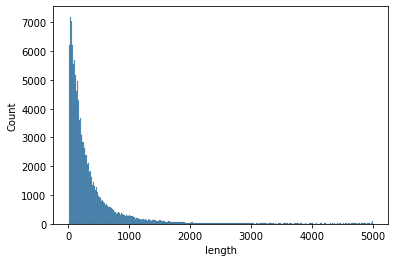

In [110]:
sns.histplot(train['length'])

In [86]:
# Most of the comments have length < =1000 chars

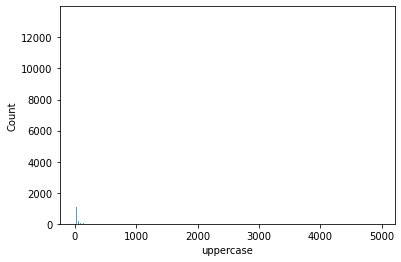

In [111]:
sns.histplot(train['uppercase'])

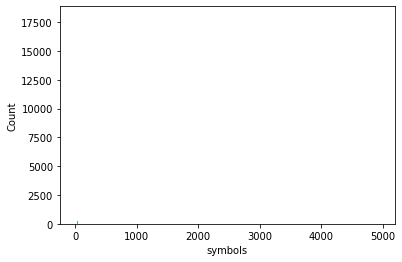

In [112]:
sns.histplot(train['symbols'])

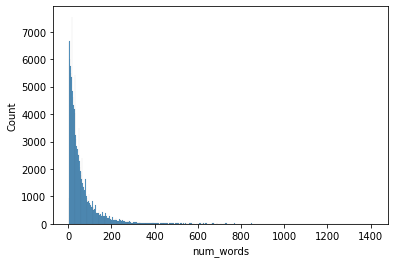

In [113]:
sns.histplot(train['num_words'])

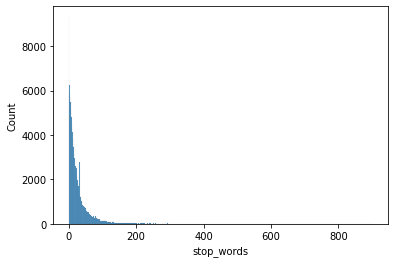

In [114]:
sns.histplot(train['stop_words'])

In [30]:
feature_cols = ['comment_text']
label_cols = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
total_cols = feature_cols + label_cols

0    144277
1     15294
Name: malignant, dtype: int64


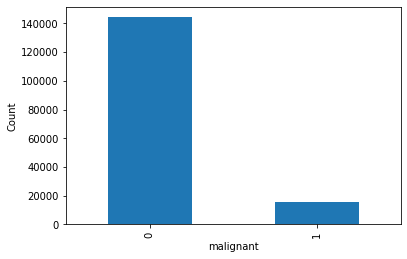

0    157976
1      1595
Name: highly_malignant, dtype: int64


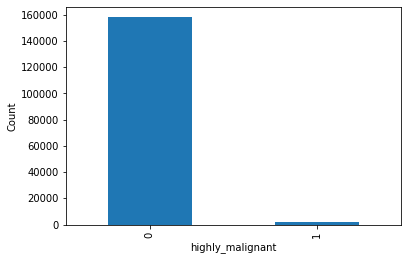

0    151122
1      8449
Name: rude, dtype: int64


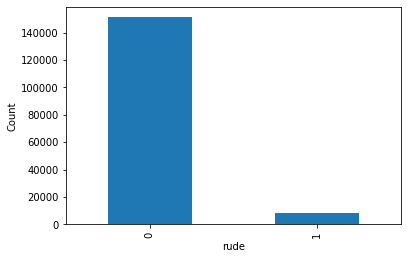

0    159093
1       478
Name: threat, dtype: int64


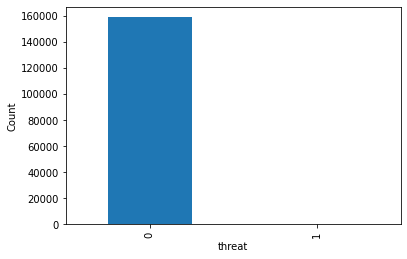

0    151694
1      7877
Name: abuse, dtype: int64


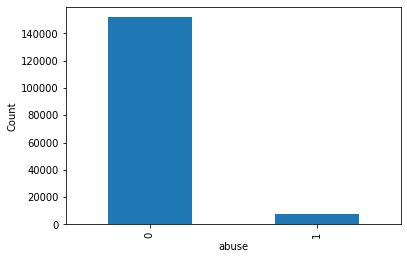

0    158166
1      1405
Name: loathe, dtype: int64


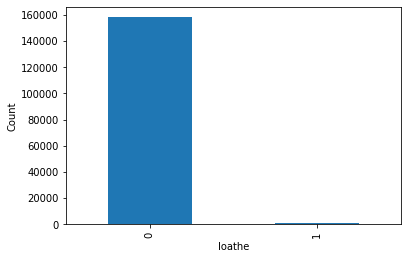

In [32]:
value_counts_list = []

for col in label_cols:
  plt.figure(figsize=(6,4))
  train[col].value_counts().plot.bar()
  print(train[col].value_counts())
  value_counts_list.append( train[col].value_counts()[1] )
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

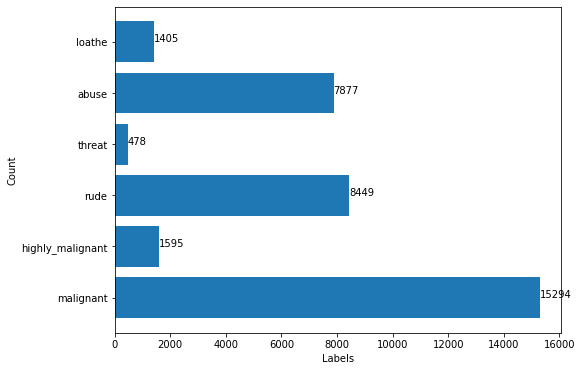

In [33]:
plt.figure(figsize=(8,6))
plt.barh(label_cols, value_counts_list)
plt.xlabel("Labels")
plt.ylabel("Count")


for index, value in enumerate(value_counts_list):
  plt.text(value, index, str(value))

In [20]:
# Now, let's make Wordclouds for various classes independently

In [15]:
from wordcloud import WordCloud,STOPWORDS

def showWordCloud(df, label):
  plt.figure(figsize=(15,12))

  text = df[df[label]==1]["comment_text"].tolist()
  label_img = WordCloud(
                          stopwords=stop,
                          background_color='black',
                          collocations=False,
                          width=1200,
                          height=800,
                         ).generate(" ".join(text))

  plt.title(label,fontsize=40)
  plt.imshow(label_img)

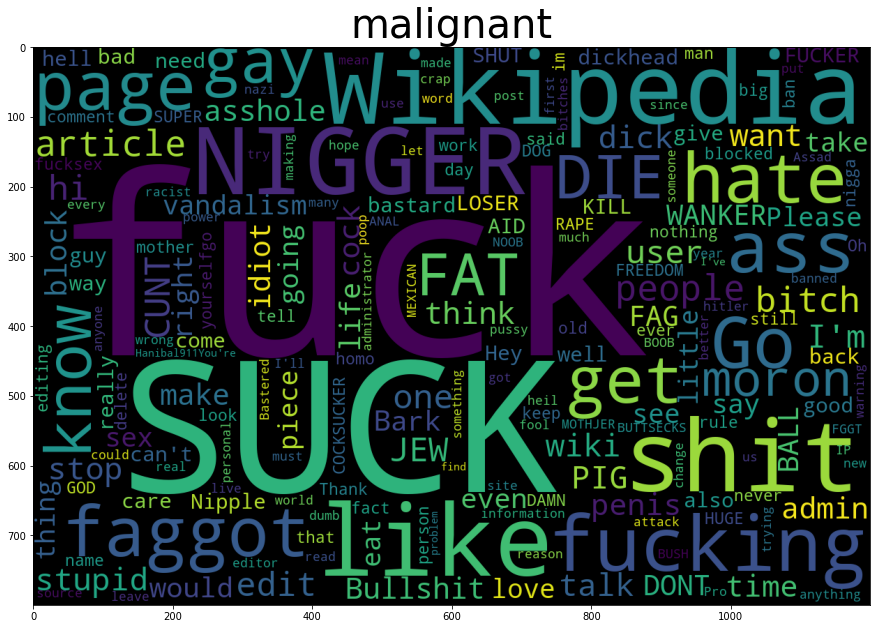

In [22]:
showWordCloud(train, 'malignant')

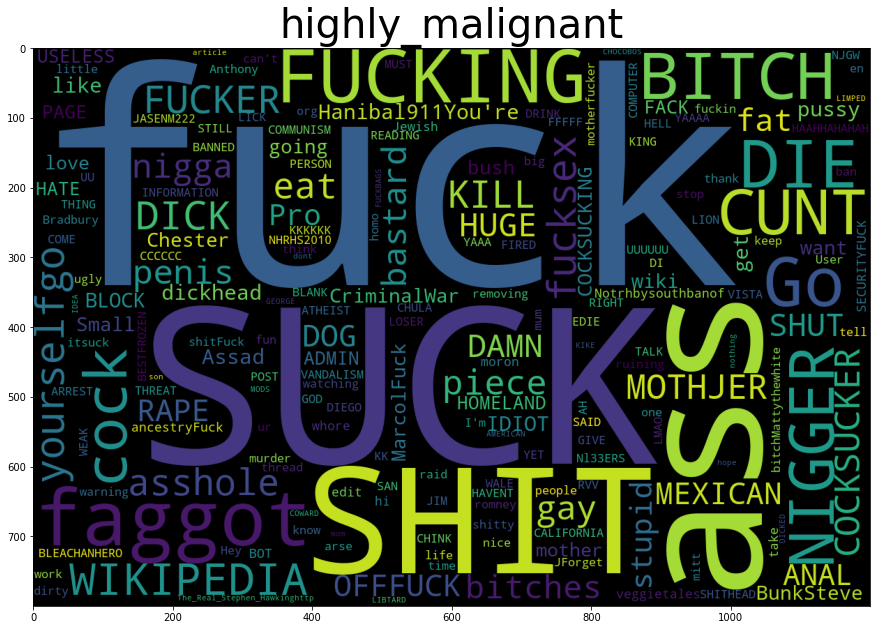

In [23]:
showWordCloud(train, 'highly_malignant')

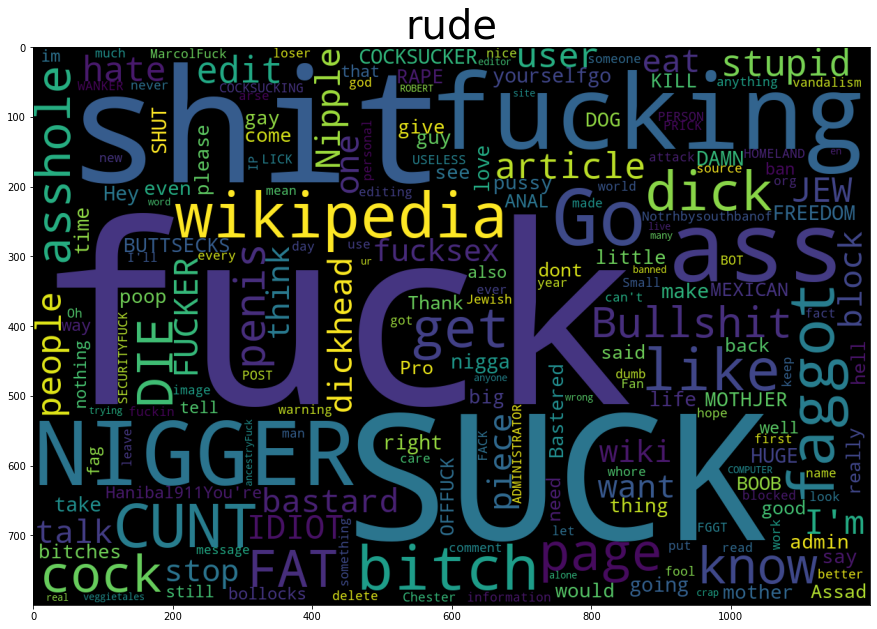

In [24]:
showWordCloud(train, 'rude')

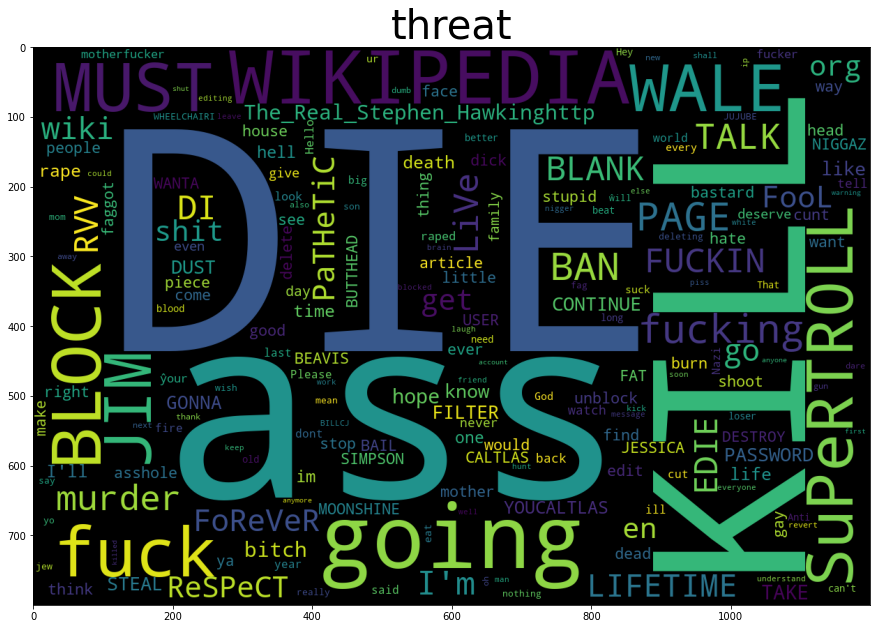

In [25]:
showWordCloud(train, 'threat')

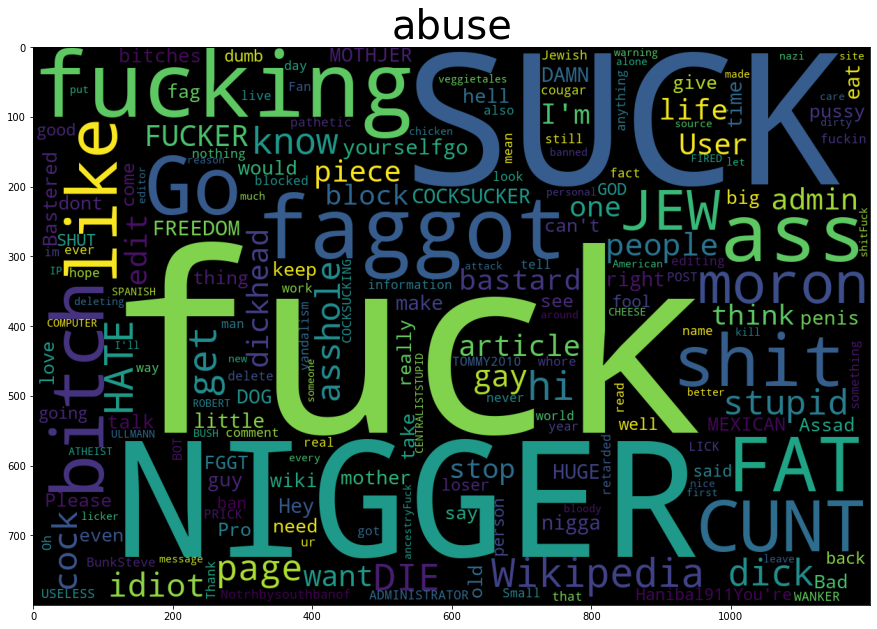

In [26]:
showWordCloud(train, 'abuse')

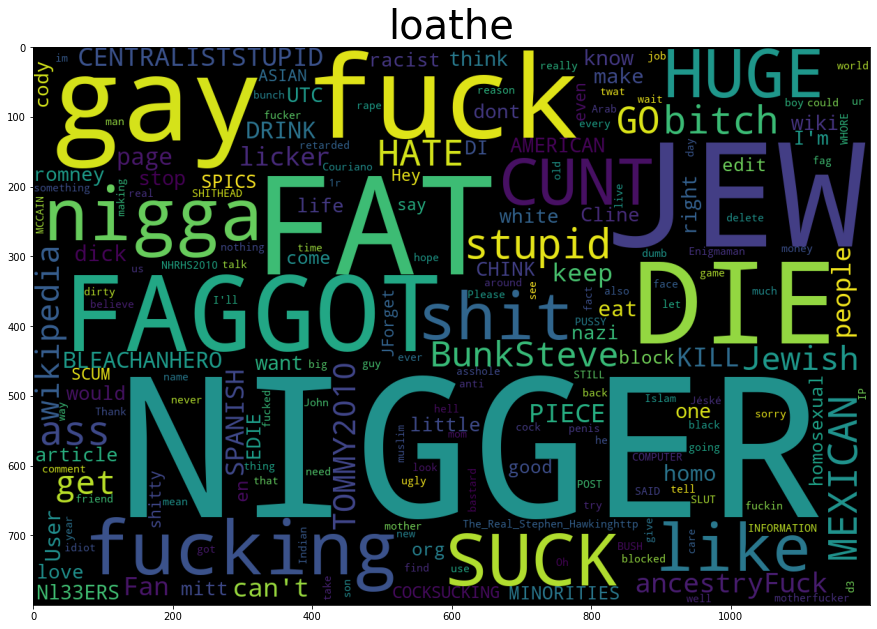

In [27]:
showWordCloud(train, 'loathe')

In [28]:
# Now, lets convert the text into vectors and combine them with other features

In [29]:
# But before doing that, lets pre-process the data

In [16]:
from nltk import word_tokenize
import re
nltk.download('punkt')

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def decontract(text):
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)


    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    return text

In [18]:
def removeHTMLTags(input_str):
  regTag = re.compile('<.*?>')
  cleantext = re.sub(regTag, ' ', str(input_str))
  return cleantext

In [19]:
def removePunctChars(input_str):
  processed_str = re.sub(r'[?|!|\'|"|#]',r'',input_str)
  processed_str = re.sub(r'[.|,|)|(|\|/]',r' ',processed_str)
  processed_str = processed_str.strip()
  processed_str = processed_str.replace("\n"," ")
  return processed_str

In [20]:
def removeOtherSpecialChars(input_str):
  modified_str = ""
  for word in input_str.split():
    mod_word = re.sub('[^a-zA-Z ]+', ' ', word)
    modified_str += mod_word 
    modified_str += " "
  return modified_str.strip()

In [21]:
def makeLower(input_str):
  return input_str.lower()

In [22]:
def removeStopWords(input_str):
  modified_str = ""
  for word in input_str.strip().split():
    if word not in stop and len(word)>2:
      modified_str += word
      modified_str += " "
  return modified_str.strip()

In [23]:

def lemmatization(input_str):
  modified_str = ""
  for word in input_str.strip().split():
    modified_word = WordNetLemmatizer().lemmatize(word)
    modified_str += modified_word
    modified_str += " "
  return modified_str.strip()

In [24]:
train["comment_text_new"] = train["comment_text"].apply(makeLower)
train["comment_text_new"] = train["comment_text_new"].apply(decontract)
train["comment_text_new"] = train["comment_text_new"].apply(removeHTMLTags)
train["comment_text_new"] = train["comment_text_new"].apply(removePunctChars)
train["comment_text_new"] = train["comment_text_new"].apply(removeOtherSpecialChars)
train["comment_text_new"] = train["comment_text_new"].apply(removeStopWords)

In [54]:
train['comment_text_new'].head()

0    explanation edits made username hardcore metal...
1    daww matches background colour seemingly stuck...
2    hey man really trying edit war guy constantly ...
3    cannot make real suggestions improvement wonde...
4                        sir hero chance remember page
Name: comment_text_new, dtype: object

In [92]:
train["comment_text_new"] = train["comment_text_new"].apply(lemmatization)

In [58]:
train['comment_text_new'].head(10)

0    explanation edits made username hardcore metal...
1    daww match background colour seemingly stuck t...
2    hey man really trying edit war guy constantly ...
3    cannot make real suggestion improvement wonder...
4                        sir hero chance remember page
5               congratulation well use tool well talk
6                          cocksucker piss around work
7    vandalism matt shirvington article reverted pl...
8    sorry word nonsense offensive anyway intending...
9                 alignment subject contrary dulithgow
Name: comment_text_new, dtype: object

In [59]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,uppercase,symbols,num_words,stop_words,comment_text_new
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,7,43,18,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,6,17,2,daww match background colour seemingly stuck t...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,4,42,20,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,7,113,56,cannot make real suggestion improvement wonder...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,4,13,5,sir hero chance remember page


In [60]:
# Now, the data cleaning part has been done
# We'll now convert the comments into vectors using word2vec pre-trained model

In [27]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-12-15 04:26:28--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.154.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.154.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  95.3MB/s    in 16s     

2020-12-15 04:26:44 (95.5 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [28]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [95]:
from tqdm import tqdm
import numpy as np
w2v_words = list(word2vec.wv.vocab)
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list(train['comment_text_new'][:100])): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = word2vec.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# It is taking too long to convert the sentences to vector like this

In [29]:
def vector(text):
     # the avg-w2v for each sentence/review is stored in this list 
      sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
      cnt_words =0; # num of words with a valid vector in the sentence/review
      for word in text.split(): # for each word in a review/sentence
          if word in w2v_words:
              vec = word2vec.wv[word]
              sent_vec += vec
              cnt_words += 1
      if cnt_words != 0:
          sent_vec /= cnt_words
      return sent_vec

In [30]:
temp=train.iloc[:1000, :]

In [98]:
temp.shape

(100, 14)

In [99]:
temp['vectors']=temp['comment_text_new'].apply(vector)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
temp.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,uppercase,symbols,num_words,stop_words,comment_text_new,vectors
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,7,43,18,explanation edits made username hardcore metal...,"[0.023877351180366848, 0.07551641049592392, 0...."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,6,17,2,daww match background colour seemingly stuck t...,"[0.0033435821533203125, -0.0065155029296875, -..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,4,42,20,hey man really trying edit war guy constantly ...,"[0.0783873058500744, 0.06044224330357143, -0.0..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,7,113,56,cannot make real suggestion improvement wonder...,"[0.02469027772241709, -0.007828070192920918, 0..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,4,13,5,sir hero chance remember page,"[0.1724609375, 0.06171875, 0.16016845703125, 0..."
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,1,2,13,4,congratulation well use tool well talk,"[0.0017725626627604167, -0.042399088541666664,..."
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,37,0,8,4,cocksucker piss around work,"[0.065185546875, -0.02099609375, 0.02792358398..."
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,4,3,20,12,vandalism matt shirvington article reverted pl...,"[0.09611002604166667, 0.0733642578125, 0.03534..."
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,7,10,83,42,sorry word nonsense offensive anyway intending...,"[0.08803593484978926, 0.021135832134046052, 0...."
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,2,0,12,8,alignment subject contrary dulithgow,"[-0.045115152994791664, 0.0072021484375, 0.059..."


In [103]:
temp['vectors'].values[0].shape

(300,)

In [1]:
# This method is taking less time but still the colab shuts off before the entire conversion

In [30]:
# So, let us use The simpler techniques such as BOW etc for Word Embedding

In [44]:
# Lets break the data frame into train and test

from sklearn.model_selection import train_test_split

tr, te = train_test_split(train, random_state=45, test_size=0.25, shuffle=True)

print(tr.shape)
print(te.shape)

(119678, 14)
(39893, 14)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2', max_features=2000)
vectorizer.fit(tr["comment_text_new"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [46]:
x_train = vectorizer.transform(tr["comment_text_new"])

x_test = vectorizer.transform(te["comment_text_new"])

In [47]:
x_train.shape, x_test.shape

((119678, 2000), (39893, 2000))

In [48]:
%%time
x_train_df=pd.DataFrame.sparse.from_spmatrix(x_train)
x_train_df.columns=vectorizer.get_feature_names()

CPU times: user 66.8 ms, sys: 2.87 ms, total: 69.6 ms
Wall time: 70.4 ms


In [49]:
x_train_df.shape

(119678, 2000)

In [50]:
tr_temp=tr[['length', 'uppercase', 'symbols', 'num_words', 'stop_words']]
tr_temp.reset_index(inplace=True)

In [51]:
tr_temp.drop(['index'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
x_train_full=pd.concat([tr_temp, x_train_df], axis=1)

In [53]:
x_train_full.shape

(119678, 2005)

In [59]:
x_train_full.head()

,length,uppercase,symbols,num_words,stop_words,ability,able,absolutely,abuse,academic,accept,acceptable,accepted,access,according,account,accounts,accurate,accusations,accused,across,act,acting,action,actions,active,actual,actually,add,add information,added,adding,addition,additional,additions,address,addressed,admin,administrator,administrators,...,women,wonder,wondering,word,wording,words,work,worked,worked reverted,working,works,world,worry,worse,worst,worth,would,would also,would appreciate,would like,would say,wow,write,write great,writer,writing,written,wrong,wrote,www,yeah,year,years,years ago,yes,yet,york,young,youtube,zero
0,194,7,3,34,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.315386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46,2,1,8,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,258,10,17,40,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,857,13,14,142,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.076794,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196,5,13,29,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281942,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
%%time
x_test_df=pd.DataFrame.sparse.from_spmatrix(x_test)
x_test_df.columns=vectorizer.get_feature_names()

CPU times: user 433 ms, sys: 12.8 ms, total: 446 ms
Wall time: 553 ms


In [55]:
x_test_df.shape

(39893, 2000)

In [56]:
te_temp=te[['length', 'uppercase', 'symbols', 'num_words', 'stop_words']]
te_temp.reset_index(inplace=True)
te_temp.drop(['index'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
x_test_full=pd.concat([te_temp, x_test_df], axis=1)
x_test_full.shape

(39893, 2005)

In [58]:
x_test_full.head()

,length,uppercase,symbols,num_words,stop_words,ability,able,absolutely,abuse,academic,accept,acceptable,accepted,access,according,account,accounts,accurate,accusations,accused,across,act,acting,action,actions,active,actual,actually,add,add information,added,adding,addition,additional,additions,address,addressed,admin,administrator,administrators,...,women,wonder,wondering,word,wording,words,work,worked,worked reverted,working,works,world,worry,worse,worst,worth,would,would also,would appreciate,would like,would say,wow,write,write great,writer,writing,written,wrong,wrote,www,yeah,year,years,years ago,yes,yet,york,young,youtube,zero
0,94,11,3,18,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,664,34,10,95,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151792,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64,1,0,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,846,28,19,134,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.077168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,671,7,18,112,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Now, model for malignant comments

In [60]:
y_train=tr['malignant']
y_test=te['malignant']

y_train.shape, y_test.shape

((119678,), (39893,))

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score

In [62]:
lr=LogisticRegression(n_jobs=-1, random_state=45)

In [63]:
lr.fit(x_train_full, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=45,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [64]:
pred=lr.predict(x_test_full)

In [65]:
print(confusion_matrix(y_test,pred))

[[35660   404]
 [ 1782  2047]]


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     36064
           1       0.84      0.53      0.65      3829

    accuracy                           0.95     39893
   macro avg       0.89      0.76      0.81     39893
weighted avg       0.94      0.95      0.94     39893



In [67]:
# The recall of minority class is a little low due to class imbalance
# Lets try state of the art algorithms like LSTMs instead of ML algorithms.

In [68]:
# But before that, lets also try Multinomial NB

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [69]:
mnb.fit(x_train_full, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
pred=mnb.predict(x_test_full)

In [71]:
print(confusion_matrix(y_test,pred))

[[34103  1961]
 [ 2676  1153]]


In [72]:
# Not performing well.